In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as stats
import seaborn as sns

In [13]:
data=pd.read_csv('https://raw.githubusercontent.com/reddyprasade/Machine-Learning-Problems-DataSets/master/Classification/Wholesale_customers.csv',skiprows=1)

In [14]:
data.shape

(440, 9)

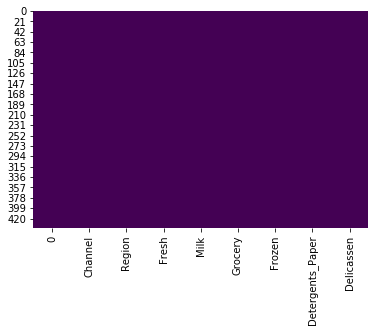

In [15]:
sns.heatmap(data.isnull(),cbar=False,cmap='viridis')

In [16]:
data.head(2)

,0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,2,3,12669,9656,7561,214,2674,1338
1,2,2,3,7057,9810,9568,1762,3293,1776


In [17]:
data.tail(2)

,0,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
438,439,1,3,10290,1981,2232,1038,168,2125
439,440,1,3,2787,1698,2510,65,477,52


In [18]:
data1=data.drop(['0'],axis=1,)
data1.head(3)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import time

In [21]:
model=KNeighborsClassifier()

In [22]:
data1.columns

Index(['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen'],
      dtype='object')

In [23]:
x=data[['Region', 'Fresh', 'Milk', 'Grocery', 'Frozen',
       'Detergents_Paper', 'Delicassen']]

In [24]:
y=data['Channel']

In [25]:
#model
x_trine,x_test,y_trine,y_test=train_test_split(x,y,test_size=0.15,random_state=25)

In [26]:
x_trine.shape

(374, 7)

In [27]:
y_trine.shape

(374,)

In [28]:
x_test.shape

(66, 7)

In [29]:
y_test.shape

(66,)

In [31]:
model=KNeighborsClassifier(n_neighbors=3,metric='euclidean')
#Trining the model using the trining set
#model.fit(features,label)
model.fit(x_trine,y_trine)
y_predict=model.predict(x_test)

In [32]:
trine_score=model.score(x_trine,y_trine)
trine_score

0.9385026737967914

In [33]:
test_score=model.score(x_test,y_test)
test_score

0.9393939393939394

In [34]:
model.classes_

array([1, 2])

In [35]:
x

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,3,12669,9656,7561,214,2674,1338
1,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
3,3,13265,1196,4221,6404,507,1788
4,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...
435,3,29703,12051,16027,13135,182,2204
436,3,39228,1431,764,4510,93,2346
437,3,14531,15488,30243,437,14841,1867
438,3,10290,1981,2232,1038,168,2125


In [36]:
#predicting the fruits
predicted=model.predict([[3,12669,9656,7561,214,2674,1338]])
print(predicted)

[2]


In [37]:
y

0      2
1      2
2      2
3      1
4      2
      ..
435    1
436    1
437    2
438    1
439    1
Name: Channel, Length: 440, dtype: int64

In [44]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_auc_score, roc_curve, auc, log_loss

In [46]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           1       0.96      0.96      0.96        50
           2       0.88      0.88      0.88        16

    accuracy                           0.94        66
   macro avg       0.92      0.92      0.92        66
weighted avg       0.94      0.94      0.94        66



In [54]:
y_predict_prob = model.predict_proba(x_test)[:, 1]

In [73]:
y_predict_prob.shape

(66,)

In [74]:
y_predict_prob

array([0.        , 1.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.66666667, 0.        ,
       1.        , 1.        , 0.        , 0.        , 0.33333333,
       0.        , 0.        , 1.        , 0.        , 1.        ,
       0.        , 1.        , 0.        , 0.        , 0.66666667,
       1.        , 1.        , 0.        , 0.        , 0.66666667,
       0.        , 0.66666667, 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 1.        , 0.        , 1.        , 1.        ,
       0.33333333, 0.        , 0.        , 0.33333333, 0.        ,
       0.        , 0.        , 0.66666667, 0.        , 0.        ,
       0.        ])

In [71]:
y_test.shape

(66,)

In [72]:
y_test

404    1
420    1
95     1
337    1
338    1
      ..
256    1
6      2
126    1
192    1
397    1
Name: Channel, Length: 66, dtype: int64

In [68]:
(fpr, tpr, thr) = roc_curve(y_test, y_predict_prob)

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

In [69]:
classes = np.unique(y_test)
if (y_predict_prob is None and not (np.all(classes == [0, 1]) or
 np.all(classes == [-1, 1]) or
 np.all(classes == [0]) or
 np.all(classes == [-1]) or
 np.all(classes == [1]))):
    raise ValueError("Data is not binary and pos_label is not specified")

In [70]:
classes

array([1, 2])